In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from wordcloud import WordCloud
from  collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv("flipkart_com-ecommerce_sample_1050.csv")

In [3]:
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

In [4]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [5]:
df.loc[1]

uniq_id                                     7b72c92c2f6c40268628ec5f14c6d590
crawl_timestamp                                    2016-04-30 03:22:56 +0000
product_url                http://www.flipkart.com/sathiyas-cotton-bath-t...
product_name                                      Sathiyas Cotton Bath Towel
product_category_tree      ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
pid                                                         BTWEGFZHGBXPHZUH
retail_price                                                             600
discounted_price                                                         449
image                                   7b72c92c2f6c40268628ec5f14c6d590.jpg
is_FK_Advantage_product                                                False
description                Specifications of Sathiyas Cotton Bath Towel (...
product_rating                                           No rating available
overall_rating                                           No rating available

In [6]:
df["product_category_tree"].str.contains("Baby")

0       False
1        True
2        True
3       False
4       False
        ...  
1045     True
1046     True
1047     True
1048     True
1049     True
Name: product_category_tree, Length: 1050, dtype: bool

In [7]:
df.shape

(1050, 15)

In [8]:
df.dtypes.value_counts()

object     12
float64     2
bool        1
dtype: int64

In [9]:
df.describe()

,retail_price,discounted_price
count,1049.000000,1049.000000
mean,2186.197331,1584.527169
std,7639.229411,7475.099680
min,35.000000,35.000000
25%,555.000000,340.000000
50%,999.000000,600.000000
75%,1999.000000,1199.000000
max,201000.000000,201000.000000


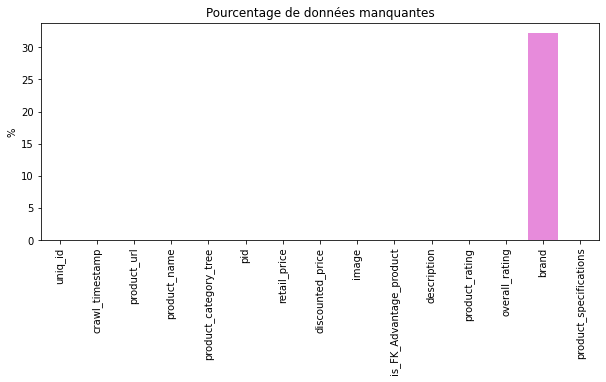

In [10]:
# Calcul du nombre de valeurs manquantes par colonne
df_na = df.isna().sum()/len(df)*100
# Affichage graphique
fig = plt.figure(1, figsize=(10, 4))
sns.barplot(x=df_na.index, y=df_na.values)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("%")
plt.title("Pourcentage de données manquantes")
plt.show()

In [11]:
df["brand"].fillna("", inplace=True)

In [12]:
df["description"]

0       Key Features of Elegance Polyester Multicolor ...
1       Specifications of Sathiyas Cotton Bath Towel (...
2       Key Features of Eurospa Cotton Terry Face Towe...
3       Key Features of SANTOSH ROYAL FASHION Cotton P...
4       Key Features of Jaipur Print Cotton Floral Kin...
                              ...                        
1045    Oren Empower Extra Large Self Adhesive Sticker...
1046    Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047    Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048    Buy Wallmantra Medium Vinyl Sticker Sticker fo...
1049    Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...
Name: description, Length: 1050, dtype: object

In [13]:
df["description"][0]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import (manifold, datasets, decomposition,
                     ensemble, discriminant_analysis, random_projection)
from matplotlib import offsetbox
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import (
    Isomap,
    LocallyLinearEmbedding,
    MDS,
    SpectralEmbedding,
    TSNE,
)
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

In [15]:
#Parsing

df.drop(['uniq_id',
           'crawl_timestamp',
           'product_url',
           'pid',
           'retail_price',
           'discounted_price',
           'is_FK_Advantage_product',
           'product_rating',
           'overall_rating',
           'brand',
           'product_specifications'],
          axis=1,
          inplace=True)

df

,product_name,product_category_tree,image,description
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",958f54f4c46b53c8a0a9b8167d9140bc.jpg,Oren Empower Extra Large Self Adhesive Sticker...
1046,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",fd6cbcc22efb6b761bd564c28928483c.jpg,Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",5912e037d12774bb73a2048f35a00009.jpg,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Buy Wallmantra Medium Vinyl Sticker Sticker fo...


In [16]:
[print(description) for description in df['product_category_tree'][0:5]][0]

["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]
["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]
["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]
["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]
["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]


In [17]:
splitted_categories = [re.split('>>',categoryTree) for categoryTree in df['product_category_tree']]
splitted_categories

[['["Home Furnishing ',
  ' Curtains & Accessories ',
  ' Curtains ',
  ' Elegance Polyester Multicolor Abstract Eyelet Do..."]'],
 ['["Baby Care ',
  ' Baby Bath & Skin ',
  ' Baby Bath Towels ',
  ' Sathiyas Baby Bath Towels ',
  ' Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]'],
 ['["Baby Care ',
  ' Baby Bath & Skin ',
  ' Baby Bath Towels ',
  ' Eurospa Baby Bath Towels ',
  ' Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]'],
 ['["Home Furnishing ',
  ' Bed Linen ',
  ' Bedsheets ',
  ' SANTOSH ROYAL FASHION Bedsheets ',
  ' SANTOSH ROYAL FASHION Cotton Printed King sized ..."]'],
 ['["Home Furnishing ',
  ' Bed Linen ',
  ' Bedsheets ',
  ' Jaipur Print Bedsheets ',
  ' Jaipur Print Cotton Floral King sized Double Bed..."]'],
 ['["Watches ', ' Wrist Watches ', ' Maserati Time Wrist Watches"]'],
 ['["Watches ', ' Wrist Watches ', ' Camerii Wrist Watches"]'],
 ['["Watches ', ' Wrist Watches ', ' T STAR Wrist Watches"]'],
 ['["Watches ', ' Wrist Watches ', ' Alfajr Wr

In [18]:
level1 = [re.sub('\W','',splitted_categories[i][0]) for i in range(0,len(splitted_categories))]
level2 = [re.sub('\W','',splitted_categories[i][1]) for i in range(0,len(splitted_categories))]
#Level3 = [re.sub('\W','',splitted_categories[i][2]) for i in range(0,len(splitted_categories))]

In [19]:
def plot_levels(levels):
    plotData = pd.Series(levels).value_counts()
    sns.barplot(x = plotData.values,
                y= plotData.index)

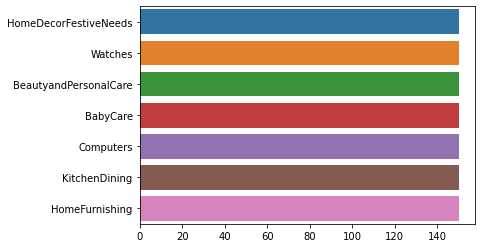

In [20]:
plot_levels(level1)

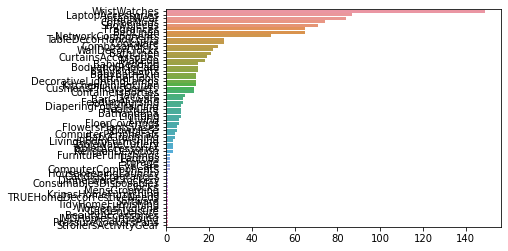

In [21]:
plot_levels(level2)

In [22]:
df['category1'] = level1
df['category2'] = level2
df

,product_name,product_category_tree,image,description,category1,category2
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,HomeFurnishing,CurtainsAccessories
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,BabyCare,BabyBathSkin
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,BabyCare,BabyBathSkin
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,HomeFurnishing,BedLinen
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,HomeFurnishing,BedLinen
...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",958f54f4c46b53c8a0a9b8167d9140bc.jpg,Oren Empower Extra Large Self Adhesive Sticker...,BabyCare,BabyKidsGifts
1046,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",fd6cbcc22efb6b761bd564c28928483c.jpg,Wallmantra Large Vinyl Sticker Sticker (Pack o...,BabyCare,BabyKidsGifts
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",5912e037d12774bb73a2048f35a00009.jpg,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,BabyCare,BabyKidsGifts
1048,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,BabyCare,BabyKidsGifts


In [23]:
df.drop('product_category_tree',
          axis=1, 
          inplace=True)
df

,product_name,image,description,category1,category2
0,Elegance Polyester Multicolor Abstract Eyelet ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,HomeFurnishing,CurtainsAccessories
1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,BabyCare,BabyBathSkin
2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,BabyCare,BabyBathSkin
3,SANTOSH ROYAL FASHION Cotton Printed King size...,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,HomeFurnishing,BedLinen
4,Jaipur Print Cotton Floral King sized Double B...,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,HomeFurnishing,BedLinen
...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Oren Empower Extra Large Self Adhesive Sticker...,BabyCare,BabyKidsGifts
1046,Wallmantra Large Vinyl Sticker Sticker,fd6cbcc22efb6b761bd564c28928483c.jpg,Wallmantra Large Vinyl Sticker Sticker (Pack o...,BabyCare,BabyKidsGifts
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,5912e037d12774bb73a2048f35a00009.jpg,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,BabyCare,BabyKidsGifts
1048,Wallmantra Medium Vinyl Sticker Sticker,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,BabyCare,BabyKidsGifts


In [24]:
df['text_data'] = df['product_name'] + df['description']
df.drop(['product_name',
           'description'],
           axis=1,
           inplace=True)

In [25]:
df

,image,category1,category2,text_data
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,HomeFurnishing,CurtainsAccessories,Elegance Polyester Multicolor Abstract Eyelet ...
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,BabyCare,BabyBathSkin,Sathiyas Cotton Bath TowelSpecifications of Sa...
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,BabyCare,BabyBathSkin,Eurospa Cotton Terry Face Towel SetKey Feature...
3,d4684dcdc759dd9cdf41504698d737d8.jpg,HomeFurnishing,BedLinen,SANTOSH ROYAL FASHION Cotton Printed King size...
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,HomeFurnishing,BedLinen,Jaipur Print Cotton Floral King sized Double B...
...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc.jpg,BabyCare,BabyKidsGifts,Oren Empower Extra Large Self Adhesive Sticker...
1046,fd6cbcc22efb6b761bd564c28928483c.jpg,BabyCare,BabyKidsGifts,Wallmantra Large Vinyl Sticker StickerWallmant...
1047,5912e037d12774bb73a2048f35a00009.jpg,BabyCare,BabyKidsGifts,Uberlyfe Extra Large Pigmented Polyvinyl Films...
1048,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,BabyCare,BabyKidsGifts,Wallmantra Medium Vinyl Sticker StickerBuy Wal...


In [26]:
le = LabelEncoder()
df['encodedLabels'] = le.fit_transform(df['category1'])
df.sample(5)

,image,category1,category2,text_data,encodedLabels
436,e921fc17a0ed9a58f76d38558deb9337.jpg,HomeDecorFestiveNeeds,Showpieces,Reiki Crystal Products Showpiece - 8 cmKey F...,3
673,c997312abfa36281d41366cb4a3b908e.jpg,KitchenDining,Lighting,VRCT 5 W LED BulbBuy VRCT 5 W LED Bulb for Rs....,5
646,f79ad10ae634dcfdab6625790d5c5d54.jpg,BabyCare,InfantWear,Seals Baby Girl's A-line DressKey Features of ...,0
594,3589e80e8f7f3f3a5b65447389b90c2e.jpg,HomeDecorFestiveNeeds,FlowersPlantsVases,Miracle Retail Bonsai Wild Plant Artificial Pl...,3
737,1dbe1f3ba28460dffef4a1d664549621.jpg,BeautyandPersonalCare,BathandSpa,AntiqueShop ABKL_PL_PL_PNKKey Features of Anti...,1


In [27]:
corpus1 = np.array([])

for row in df['text_data']:
    corpus1 = np.append(df['text_data'], row)

print(corpus1)

['Elegance Polyester Multicolor Abstract Eyelet Door CurtainKey Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant

In [28]:
for i in range(len(corpus1 )):
    corpus1 [i] = corpus1 [i].lower()
    corpus1 [i] = re.sub(r'\W',' ',corpus1 [i])
    corpus1 [i] = re.sub(r'\s+',' ',corpus1 [i])

In [29]:
#tokenisation
from nltk.tokenize import word_tokenize
tokenized_word1 =word_tokenize(df['text_data'][0])
print(tokenized_word1)

['Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'CurtainKey', 'Features', 'of', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', 'Floral', 'Curtain', ',', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', '(', '213', 'cm', 'in', 'Height', ',', 'Pack', 'of', '2', ')', 'Price', ':', 'Rs', '.', '899', 'This', 'curtain', 'enhances', 'the', 'look', 'of', 'the', 'interiors.This', 'curtain', 'is', 'made', 'from', '100', '%', 'high', 'quality', 'polyester', 'fabric.It', 'features', 'an', 'eyelet', 'style', 'stitch', 'with', 'Metal', 'Ring.It', 'makes', 'the', 'room', 'environment', 'romantic', 'and', 'loving.This', 'curtain', 'is', 'ant-', 'wrinkle', 'and', 'anti', 'shrinkage', 'and', 'have', 'elegant', 'apparance.Give', 'your', 'home', 'a', 'bright', 'and', 'modernistic', 'appeal', 'with', 'these', 'designs', '.', 'The', 'surreal', 'attention', 'is', 'sure', 'to', 'steal', 'hearts', '.', 'These', 'contemporary'

In [30]:
from nltk.stem.snowball import SnowballStemmer

words1 = [word for word in tokenized_word1 if word.isalpha()]
print(words1[:100])
snowball = SnowballStemmer("english")
stemmed3 = [snowball.stem(word) for word in words1]
print(stemmed3[:100])

['Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'CurtainKey', 'Features', 'of', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', 'Floral', 'Curtain', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', 'cm', 'in', 'Height', 'Pack', 'of', 'Price', 'Rs', 'This', 'curtain', 'enhances', 'the', 'look', 'of', 'the', 'curtain', 'is', 'made', 'from', 'high', 'quality', 'polyester', 'features', 'an', 'eyelet', 'style', 'stitch', 'with', 'Metal', 'makes', 'the', 'room', 'environment', 'romantic', 'and', 'curtain', 'is', 'wrinkle', 'and', 'anti', 'shrinkage', 'and', 'have', 'elegant', 'your', 'home', 'a', 'bright', 'and', 'modernistic', 'appeal', 'with', 'these', 'designs', 'The', 'surreal', 'attention', 'is', 'sure', 'to', 'steal', 'hearts', 'These', 'contemporary', 'eyelet', 'and', 'valance', 'curtains', 'slide', 'smoothly', 'so', 'when', 'you', 'draw', 'them', 'apart']
['eleg', 'polyest', 'multicolor', 'abstract',

In [31]:
from nltk.corpus import stopwords
stop_words1 = set(stopwords.words("english"))
filtered_words1 = []
for w in words1 :
    if w not in stop_words1:
        filtered_words1.append(w)
print (filtered_words1)

['Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'CurtainKey', 'Features', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', 'Floral', 'Curtain', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', 'cm', 'Height', 'Pack', 'Price', 'Rs', 'This', 'curtain', 'enhances', 'look', 'curtain', 'made', 'high', 'quality', 'polyester', 'features', 'eyelet', 'style', 'stitch', 'Metal', 'makes', 'room', 'environment', 'romantic', 'curtain', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'home', 'bright', 'modernistic', 'appeal', 'designs', 'The', 'surreal', 'attention', 'sure', 'steal', 'hearts', 'These', 'contemporary', 'eyelet', 'valance', 'curtains', 'slide', 'smoothly', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'rays', 'want', 'wish', 'good', 'morning', 'whole', 'world', 'draw', 'close', 'evening', 'create', 'special', 'moments', 'joyous', 'beauty', 'given', 'soothing', 'prints', 'Bring', 

In [32]:
#stemming stopwords - Snowball
stemmedSB1 = [snowball.stem(word) for word in filtered_words1]
print(stemmedSB1[:100])

['eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtainkey', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'cm', 'height', 'pack', 'price', 'rs', 'this', 'curtain', 'enhanc', 'look', 'curtain', 'made', 'high', 'qualiti', 'polyest', 'featur', 'eyelet', 'style', 'stitch', 'metal', 'make', 'room', 'environ', 'romant', 'curtain', 'wrinkl', 'anti', 'shrinkag', 'eleg', 'home', 'bright', 'modernist', 'appeal', 'design', 'the', 'surreal', 'attent', 'sure', 'steal', 'heart', 'these', 'contemporari', 'eyelet', 'valanc', 'curtain', 'slide', 'smooth', 'draw', 'apart', 'first', 'thing', 'morn', 'welcom', 'bright', 'sun', 'ray', 'want', 'wish', 'good', 'morn', 'whole', 'world', 'draw', 'close', 'even', 'creat', 'special', 'moment', 'joyous', 'beauti', 'given', 'sooth', 'print', 'bring', 'home', 'eleg', 'curtain']


In [34]:
#NLTK
import string
import nltk
from nltk.stem.porter import PorterStemmer

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Clean 
cleaned_corpus1  = []

for row in df['text_data']:
    token1 = word_tokenize(row)

    # lower
    words1 = [word.lower() for word in token1]

    # Suppression des mots non alphabétique
    words1 = [word for word in words1 if word.isalpha()]

    # Suppression ponctuation
    table = str.maketrans('', '', string.punctuation)

    #Stripped
    stripped = [w.translate(table) for w in words1]

    #stop word
    english_stop_word1 = set(stopwords.words('english'))

    #Filtre Stop Word
    words1 = [w for w in words1 if not w in english_stop_word1]
    
    words1 = [w for w in words1 if len(w) > 2]
    
    words1 = [w for w in words1 if not w in ['rs']]
    
    # Racine du mot : Stemmed
    snowball = SnowballStemmer("english")
    stemmed1= [snowball.stem(word) for word in words1]
        
    cleaned_corpus1.append(stemmed1)

In [35]:
cleaned_corpus3 = [" ".join(strings) for strings in cleaned_corpus1 ] 

In [36]:
df["cleaned_text"] = cleaned_corpus3
df

,image,category1,category2,text_data,encodedLabels,cleaned_text
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,HomeFurnishing,CurtainsAccessories,Elegance Polyester Multicolor Abstract Eyelet ...,4,eleg polyest multicolor abstract eyelet door c...
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,BabyCare,BabyBathSkin,Sathiyas Cotton Bath TowelSpecifications of Sa...,0,sathiya cotton bath towelspecif sathiya cotton...
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,BabyCare,BabyBathSkin,Eurospa Cotton Terry Face Towel SetKey Feature...,0,eurospa cotton terri face towel setkey featur ...
3,d4684dcdc759dd9cdf41504698d737d8.jpg,HomeFurnishing,BedLinen,SANTOSH ROYAL FASHION Cotton Printed King size...,4,santosh royal fashion cotton print king size d...
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,HomeFurnishing,BedLinen,Jaipur Print Cotton Floral King sized Double B...,4,jaipur print cotton floral king size doubl bed...
...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc.jpg,BabyCare,BabyKidsGifts,Oren Empower Extra Large Self Adhesive Sticker...,0,oren empow extra larg self adhes stickeroren e...
1046,fd6cbcc22efb6b761bd564c28928483c.jpg,BabyCare,BabyKidsGifts,Wallmantra Large Vinyl Sticker StickerWallmant...,0,wallmantra larg vinyl sticker stickerwallmantr...
1047,5912e037d12774bb73a2048f35a00009.jpg,BabyCare,BabyKidsGifts,Uberlyfe Extra Large Pigmented Polyvinyl Films...,0,uberlyf extra larg pigment polyvinyl film impo...
1048,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,BabyCare,BabyKidsGifts,Wallmantra Medium Vinyl Sticker StickerBuy Wal...,0,wallmantra medium vinyl sticker stickerbuy wal...


In [37]:
vectorizer = TfidfVectorizer()
tfIdfData = vectorizer.fit_transform(df["cleaned_text"])

In [38]:
tfIdfData.shape


(1050, 4080)

In [39]:
def factorize(highColData):
    pcaData = PCA(n_components = 0.99)
    return(pcaData.fit_transform(highColData))

In [40]:
projectionTFIDF = factorize(tfIdfData.toarray())


In [41]:
projectionTFIDF.shape

(1050, 789)

In [42]:
print(f'Se débarasser de {tfIdfData.shape[1] - projectionTFIDF.shape[1]} colonnes de données n\'enlève qu 1% des données')

Se débarasser de 3291 colonnes de données n'enlève qu 1% des données


In [43]:
df['text_data'][1]

'Sathiyas Cotton Bath TowelSpecifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel'

In [44]:
def evaluate_clusterData(clusterData):

            model = KMeans(n_clusters=7,
                           random_state=2)
            clusterLabels = model.fit(clusterData).labels_
            ARI = adjusted_rand_score(df['encodedLabels'],clusterLabels)

            visualizer = TSNE(n_jobs=-1)

            X_tsne = visualizer.fit_transform(clusterData)
            vizData = pd.DataFrame(X_tsne)

            fig, ax = plt.subplots(1,2,
                                   figsize=(20,10))

            sns.scatterplot(x= vizData[0],
                            y= vizData[1],
                            hue=df['category1'],
                            palette=sns.color_palette('tab10', n_colors=7), 
                            ax=ax[0])
            ax[0].set_title('Partitionnage réel')
            sns.scatterplot(x= vizData[0],
                            y= vizData[1],
                            hue=clusterLabels,
                            palette=sns.color_palette('Dark2',n_colors=7),
                            ax=ax[1]);
            ax[1].set_title('Partitionnage non supervisé')

            print(f'Le score ARI est égal à {ARI:.2f}')

Le score ARI est égal à 0.31


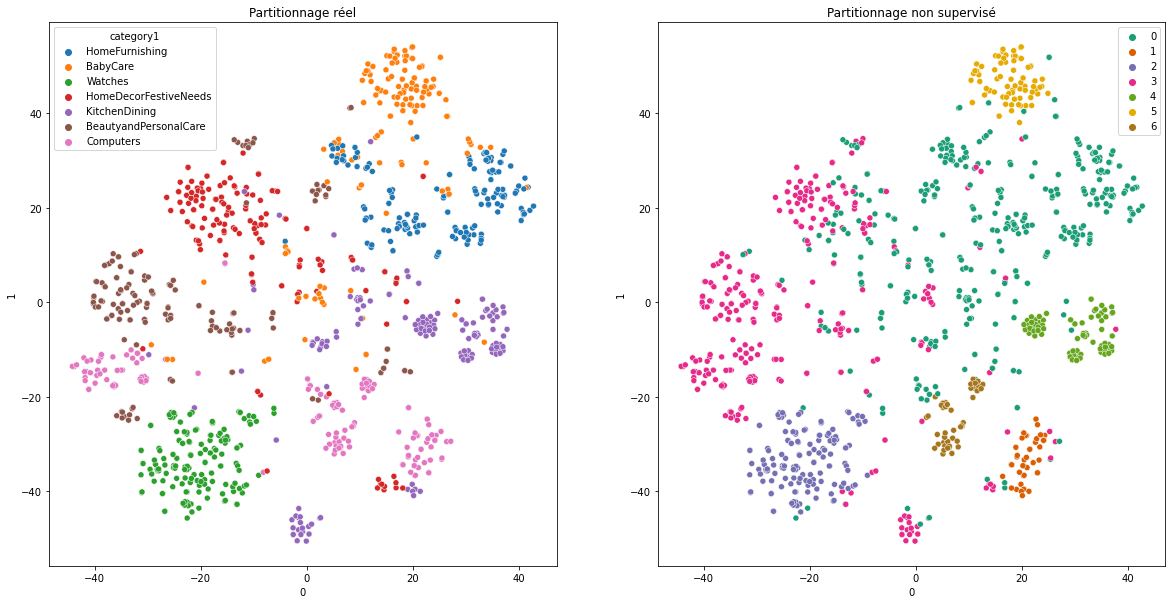

In [45]:
evaluate_clusterData(projectionTFIDF)


In [46]:
df

,image,category1,category2,text_data,encodedLabels,cleaned_text
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,HomeFurnishing,CurtainsAccessories,Elegance Polyester Multicolor Abstract Eyelet ...,4,eleg polyest multicolor abstract eyelet door c...
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,BabyCare,BabyBathSkin,Sathiyas Cotton Bath TowelSpecifications of Sa...,0,sathiya cotton bath towelspecif sathiya cotton...
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,BabyCare,BabyBathSkin,Eurospa Cotton Terry Face Towel SetKey Feature...,0,eurospa cotton terri face towel setkey featur ...
3,d4684dcdc759dd9cdf41504698d737d8.jpg,HomeFurnishing,BedLinen,SANTOSH ROYAL FASHION Cotton Printed King size...,4,santosh royal fashion cotton print king size d...
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,HomeFurnishing,BedLinen,Jaipur Print Cotton Floral King sized Double B...,4,jaipur print cotton floral king size doubl bed...
...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc.jpg,BabyCare,BabyKidsGifts,Oren Empower Extra Large Self Adhesive Sticker...,0,oren empow extra larg self adhes stickeroren e...
1046,fd6cbcc22efb6b761bd564c28928483c.jpg,BabyCare,BabyKidsGifts,Wallmantra Large Vinyl Sticker StickerWallmant...,0,wallmantra larg vinyl sticker stickerwallmantr...
1047,5912e037d12774bb73a2048f35a00009.jpg,BabyCare,BabyKidsGifts,Uberlyfe Extra Large Pigmented Polyvinyl Films...,0,uberlyf extra larg pigment polyvinyl film impo...
1048,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,BabyCare,BabyKidsGifts,Wallmantra Medium Vinyl Sticker StickerBuy Wal...,0,wallmantra medium vinyl sticker stickerbuy wal...


In [47]:
#Images

In [48]:
from PIL import Image
import cv2
import time


In [49]:
path = 'Images/'

In [50]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

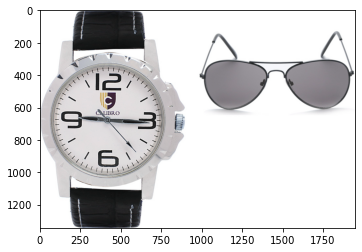

In [51]:
plt.imshow(cv2.imread((path+df['image'][10])))

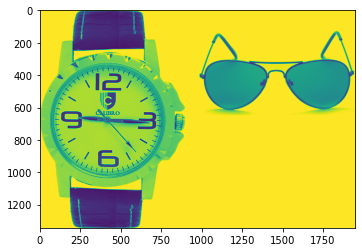

In [52]:
imgDemo = cv2.imread(path+df['image'][10],0)
plt.imshow(imgDemo);

In [53]:
equalizedDemo = cv2.equalizeHist(imgDemo)

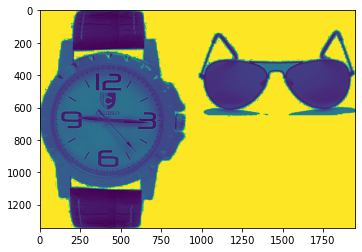

In [54]:
plt.imshow(equalizedDemo);

In [55]:
orb_keypoints = []
temps1=time.time()
orb = cv2.ORB_create(500)

for image_num in range(df.shape[0]) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+df['image'][image_num],0) 
    res = cv2.equalizeHist(image)   
    kp, des = orb.detectAndCompute(res, None)
    orb_keypoints.append(des)

orb_keypoints_by_img = np.asarray(orb_keypoints)
orb_keypoints_all    = np.concatenate(orb_keypoints_by_img, axis=0)

print("Nombre de descripteurs : ", orb_keypoints_all.shape)

duration1=time.time()-temps1

print("temps de traitement ORB descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
Nombre de descripteurs :  (520145, 32)
temps de traitement ORB descriptor :            67.57 secondes


<ipython-input-55-3bc559320f7e>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  orb_keypoints_by_img = np.asarray(orb_keypoints)


In [56]:
kp, des = orb.detectAndCompute(imgDemo,None)


In [57]:
kpDisplayDemo = cv2.drawKeypoints(imgDemo,kp,imgDemo)


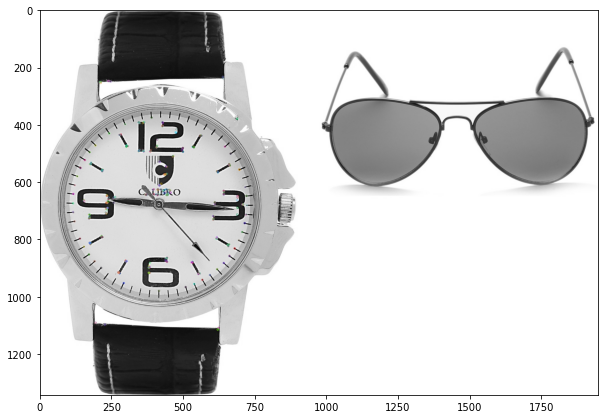

In [58]:
plt.figure(figsize=(10,10))
plt.imshow(kpDisplayDemo);

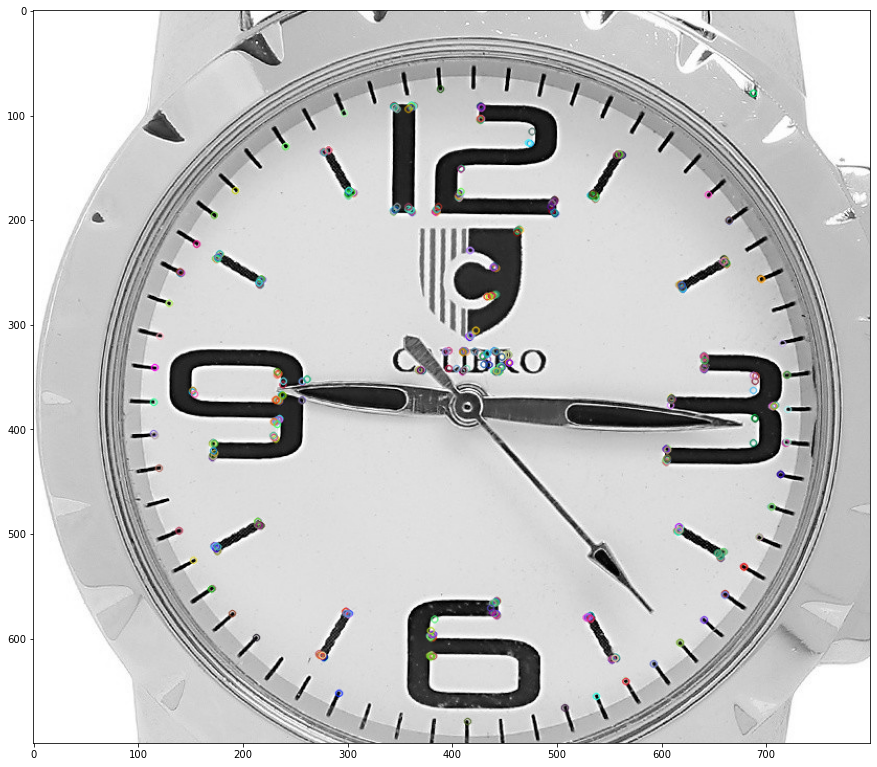

In [59]:
plt.figure(figsize=(15,15))
plt.imshow(kpDisplayDemo[300:1000,0:800]);

In [60]:
kpDisplayDemo.shape

(1343, 1948, 3)

In [61]:
kpDisplayDemo[:,:,0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

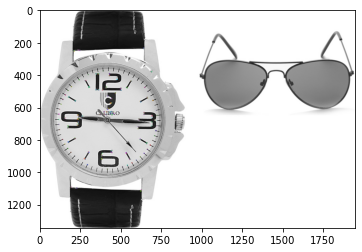

In [62]:
plt.imshow(kpDisplayDemo)

In [63]:
kpDisplayDemo

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [64]:
2**8

256

In [65]:
from sklearn.cluster import KMeans, MiniBatchKMeans


In [66]:
temps1 = time.time()

# racine carrée des keypoints pour  nombre de clusters pour éviter de la perte d'info ?

k = int(round(np.sqrt(len(orb_keypoints_all)), 0))
print("Nombre de clusters estimés : ", k)
print("Création de", k, "clusters de descripteurs ...")

# Clustering
kmeans = MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(orb_keypoints_all)

duration1 = time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  721
Création de 721 clusters de descripteurs ...
temps de traitement kmeans :             6.12 secondes


In [67]:
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des # hist egalization
    return hist


hist_vectors=[]

for i, image_desc in enumerate(orb_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) 
    hist_vectors.append(hist) 

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             4.57 secondes


In [68]:
projectionImg = factorize(im_features)


In [69]:
im_features

array([[0.004, 0.012, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.002, 0.006, ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.002, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.004, 0.008, 0.006, ..., 0.   , 0.   , 0.   ],
       [0.   , 0.018, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.004, 0.   , 0.006, ..., 0.   , 0.   , 0.002]])

In [70]:
projectionImg.shape


(1050, 412)

Le score ARI est égal à 0.02


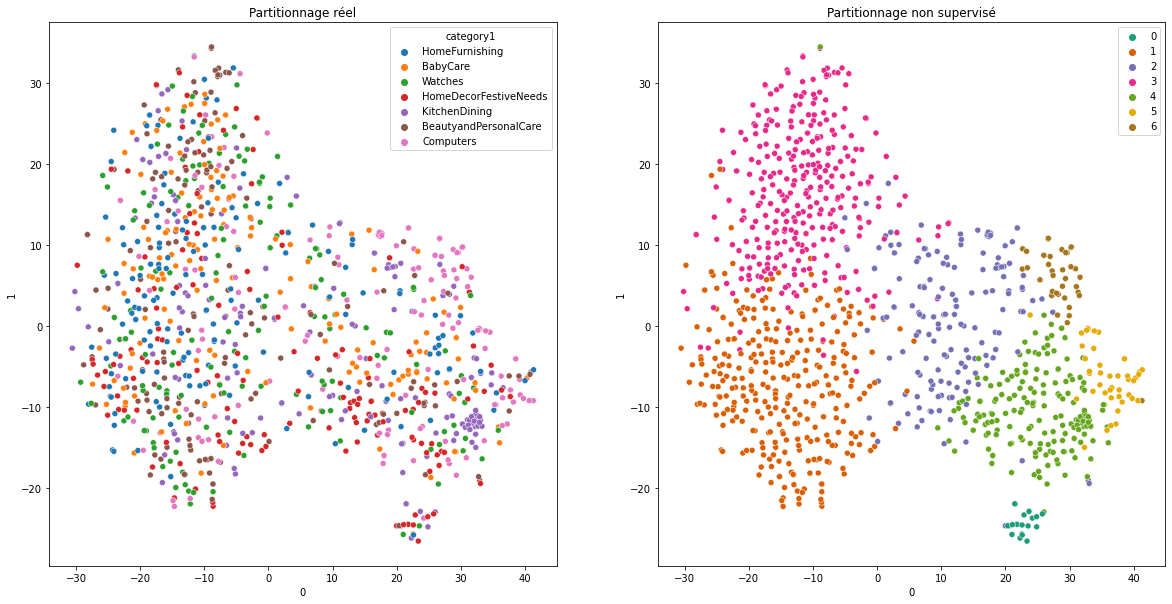

In [71]:
evaluate_clusterData(projectionImg)


In [72]:
#VGG16

In [73]:
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.models import Model

In [74]:
nnModel = VGG16()
nnModel = Model(inputs=nnModel.inputs, outputs=nnModel.layers[-2].output)
nnModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [75]:
def VG16_extract_features(imgSeries):
    loadedImgs = [load_img(path+img, target_size=(224,224)) for img in imgSeries]
    arrayImgs = [img_to_array(img) for img in loadedImgs]
    reshapedArrays = [img.reshape(((1, img.shape[0], img.shape[1], img.shape[2]))) for img in arrayImgs]   
    features = []
    for i in range(len(reshapedArrays)):
        if i%100 == 0 : print(i)  
        features.append(nnModel.predict(reshapedArrays[i]).ravel())
        
    featuresDF = pd.DataFrame(features)
    return(featuresDF)

In [76]:
nnVisionFeatures = VG16_extract_features(df['image'])


C:\Users\Shadow\anaconda3\lib\site-packages\PIL\Image.py:3011: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


0
100
200
300
400
500
600
700
800
900
1000


In [77]:
nnVisionFeatures.shape

(1050, 4096)

Le score ARI est égal à 0.40


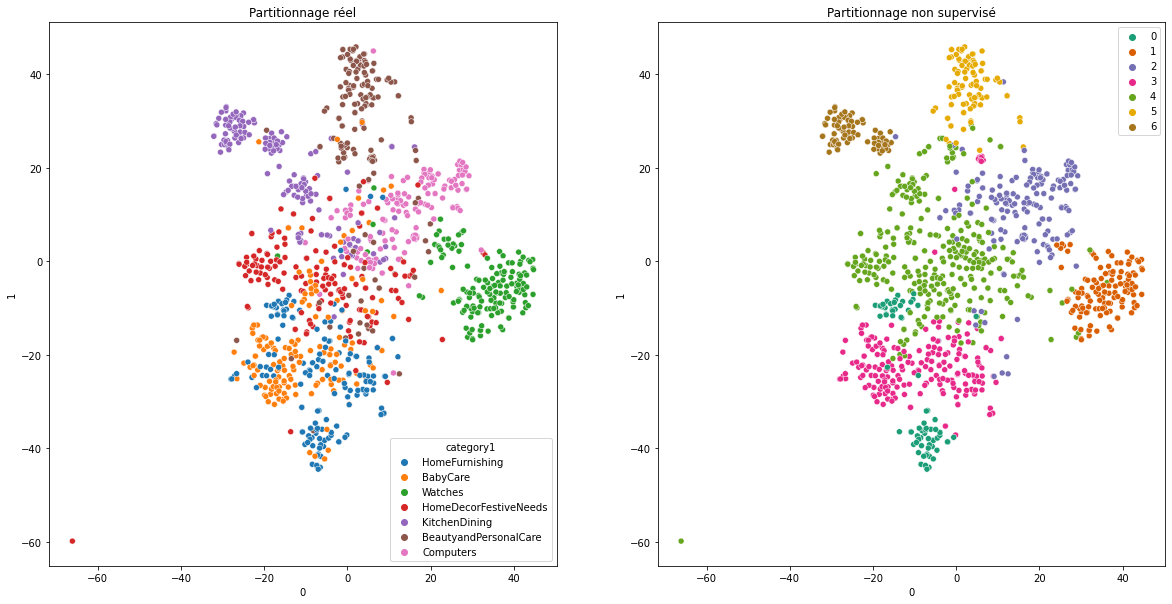

In [78]:
evaluate_clusterData(nnVisionFeatures)

In [79]:
projectionImgNN = factorize(nnVisionFeatures)


In [80]:
projectionImgNN.shape


(1050, 787)

Le score ARI est égal à 0.40


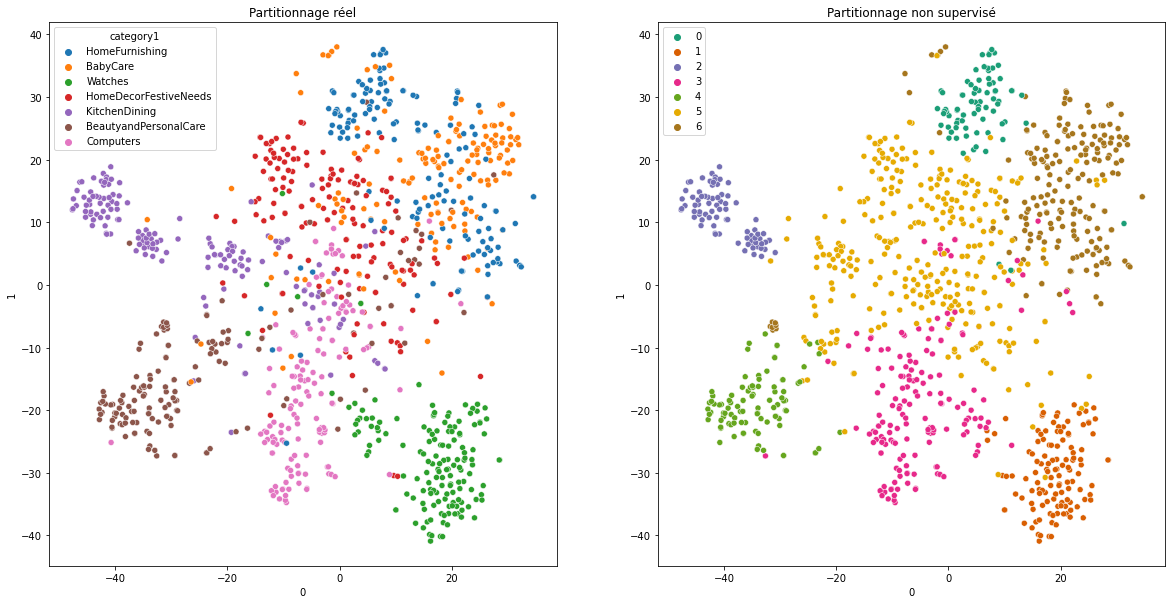

In [81]:
evaluate_clusterData(projectionImgNN)


Le score ARI est égal à 0.40


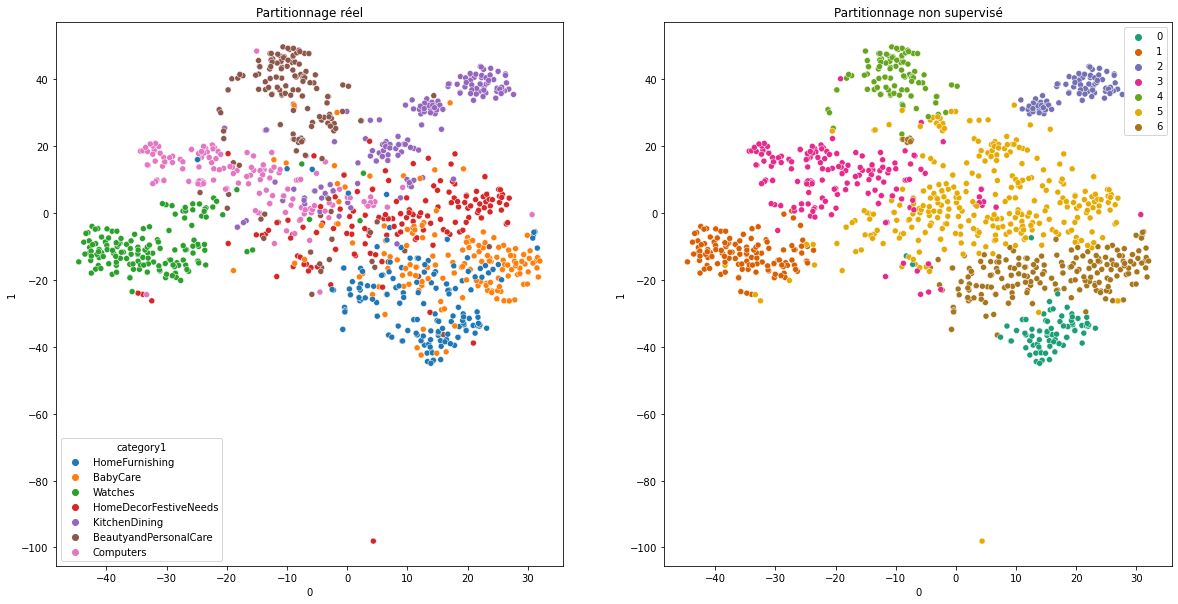

In [82]:
#Images + Texte
evaluate_clusterData(np.hstack([projectionImgNN,projectionTFIDF]))

In [83]:
#Spacy & Performance du Clustering

In [84]:
import spacy

In [85]:
nlp = spacy.load("en_core_web_lg")

In [86]:
def clean_text(text):
    doc = nlp(text)
    cleanText = []
    for token in doc:
        if not token.is_punct and not token.is_stop and not token.is_space :
            cleanText.append(token.lemma_.lower())
    return(' '.join(cleanText))

In [87]:
def mean_ARI(clusterData):
    ARIs = []
    for i in range(1,60):
        model = KMeans(n_clusters=7,
                       random_state=i)
        clusterLabels = model.fit(clusterData).labels_
        ARIs.append(adjusted_rand_score(df['encodedLabels'],clusterLabels))
    mean = np.mean(ARIs)
    return(mean)

In [88]:
def vectorize_text(Series):
    vectors = [nlp(doc).vector for doc in Series]
    return pd.DataFrame(vectors)

In [89]:
def clean_Series(Series):
    textList = [clean_text(doc) for doc in Series]
    return(pd.Series(textList))

In [90]:
cleanDocs = clean_Series(df['text_data'])

In [91]:
vectors = vectorize_text(cleanDocs)

In [92]:
preprocessingTechniques = {'TFIDF':projectionTFIDF,
                           'ORB':projectionImg,
                           'TFIDF + ORB':np.hstack([projectionTFIDF,projectionImg]),
                           'Transfer Vectors':vectors,
                           'Transfer CNN':projectionImgNN,
                           'Transfer CNN + Vectors':np.hstack([vectors,projectionImgNN])}

In [93]:
results = [mean_ARI(processedData) for processedData in preprocessingTechniques.values()]


In [94]:
perfDF = pd.DataFrame(results)
perfDF['méthode'] = preprocessingTechniques.keys()

In [95]:
perfDF.columns = ['ARI moyen', 'méthode']

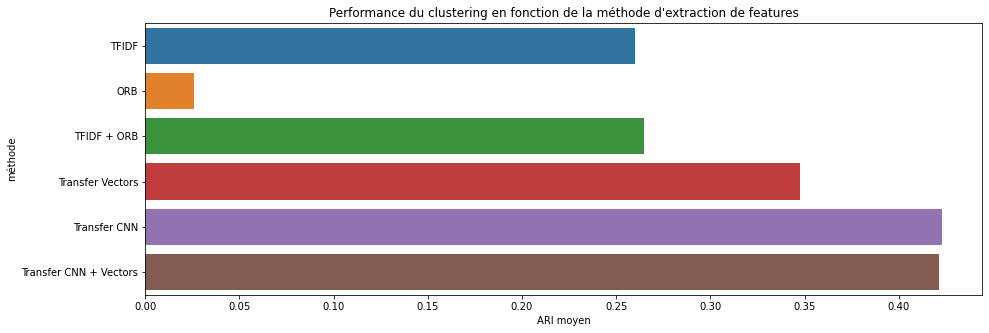

In [96]:
plt.figure(figsize=(15,5))
plt.title("Performance du clustering en fonction de la méthode d'extraction de features")
sns.barplot(x = 'ARI moyen',
            y = 'méthode',
            ci='sd',
            data=perfDF);

In [97]:
#Exemples aléatoires

In [98]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

In [99]:
df_train, df_test = train_test_split(df, train_size=.8)

In [103]:
tfidf = TfidfVectorizer()
pca = PCA(100)
logistic = LogisticRegressionCV(max_iter=10000)

x_train = pca.fit_transform(tfidf.fit_transform(df_train.text_data).toarray())
x_test = pca.transform(tfidf.transform(df_test.text_data).toarray())

logistic.fit(x_train, df_train['category1'])
df_train['category_pred'] = logistic.predict(x_train)
df_train['category_proba'] = logistic.predict_proba(x_train).max(axis=1)
df_test['category_pred'] = logistic.predict(x_test)
df_test['category_proba'] = logistic.predict_proba(x_test).max(axis=1)

<ipython-input-103-ac54bd4e29a3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['category_pred'] = logistic.predict(x_train)
<ipython-input-103-ac54bd4e29a3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['category_proba'] = logistic.predict_proba(x_train).max(axis=1)
<ipython-input-103-ac54bd4e29a3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [104]:
print(
    f"train rate: {(df_train['category_pred'] == df_train['category1']).mean()}\n"
    f"test rate: {(df_test['category_pred'] == df_test['category1']).mean()}"
)

train rate: 0.95
test rate: 0.9523809523809523


In [105]:
import random

i = random.choice(df_test.index)
row = df_test.loc[i]
print(
    f'i = {i}',
    f'text_data = {row.text_data}',
    f'category1 = {row.category1}',
    f'category_pred = {row.category_pred}',
    f'category_proba = {row.category_proba}',
    sep='\n' * 2
)

i = 361

text_data = Aero Care La Royal Orange & Ice Combo SetFlipkart.com: Buy Aero Care La Royal Orange & Ice Combo Set online only for Rs. 165 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!

category1 = BeautyandPersonalCare

category_pred = BeautyandPersonalCare

category_proba = 0.8328429049324968


In [106]:
#Test K neighbors images

In [107]:
df.columns

Index(['image', 'category1', 'category2', 'text_data', 'encodedLabels',
       'cleaned_text'],
      dtype='object')

In [108]:
df1 = df[["image",'category1']].copy()
df1.columns

Index(['image', 'category1'], dtype='object')

In [109]:
x = nnVisionFeatures
Y = df1['category1']

In [110]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, Y, train_size=0.8)

In [112]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [113]:
error = 1 - knn.score(xtest, ytest)
print('Erreur: %f' % error)

Erreur: 0.228571
